# Does Elon Musk move the market from his tweets?

In [3]:
pip install snscrape

Note: you may need to restart the kernel to use updated packages.


# 0. Libraries

In [304]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

# 1. Constansts.

In [305]:
word = "doge"
limit = 20000

# 2. Retrieving Elon Musk Tweets

In [214]:
query = "(from:elonmusk) until:2023-01-01 since:2018-01-01"
tweets = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

C:\Users\PCALAT~1\AppData\Local\Temp/ipykernel_14644/3188442063.py:11: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
C:\Users\PCALAT~1\AppData\Local\Temp/ipykernel_14644/3188442063.py:11: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


                           Date      User  \
0     2022-12-31 22:19:51+00:00  elonmusk   
1     2022-12-31 22:15:41+00:00  elonmusk   
2     2022-12-31 22:10:36+00:00  elonmusk   
3     2022-12-31 22:09:21+00:00  elonmusk   
4     2022-12-31 21:41:42+00:00  elonmusk   
...                         ...       ...   
16301 2018-01-07 03:00:48+00:00  elonmusk   
16302 2018-01-05 00:30:15+00:00  elonmusk   
16303 2018-01-05 00:30:00+00:00  elonmusk   
16304 2018-01-03 08:22:31+00:00  elonmusk   
16305 2018-01-03 05:38:16+00:00  elonmusk   

                                                   Tweet  
0            @WholeMarsBlog Agreed, update coming in Jan  
1      @jpr007 I’d like to thank the people of Norway...  
2      @ScottAdamsSays @Mediaite Yeah, this is silly....  
3      @TimRunsHisMouth @ZaleskiLuke Exactly! I am ob...  
4                       @pmarca Piketty is a misanthrope  
...                                                  ...  
16301                                  @mhmtkc

# 3. Getting all the tweets that cointain "doge"

In [306]:
df_word=pd.DataFrame(columns = ["Date","User","Tweet"])

###  3.1. Removing all the tweets that have retweet

In [309]:
# I want to keep just the plain tweets

for i in df.index:
        if word in df["Tweet"].loc[i].lower() and "@" not in df["Tweet"].loc[i].lower():
        #if word in df["Tweet"].loc[i].lower():
            df_word.loc[len(df_word)] = list(df.loc[i])

# 4. Data Agreggation

## 4.1. Getting Doge Price

In [310]:
df_doge=pd.read_csv('DOGEUSDT-5m-update-to-2023_01_25_11_25_00-from-2017_01_01_00_00_00.csv')
df_doge["timestamp"] = pd.to_datetime(df_doge["timestamp"],format = '%Y-%m-%d %H:%M:%S',utc='UTC')

## 4.2. Joining tweet data set and price data set

In [311]:
price=[]

timestamp=[]

position=[]

for i in df_word["Date"]:
    
    for j in range(1,len(df_doge["timestamp"])):
        
        if i > df_doge["timestamp"].loc[j-1] and i < df_doge["timestamp"].loc[j]:
            
            price.append(df_doge["close"].loc[j])
            
            timestamp.append(df_doge["timestamp"].loc[j])
            
            position.append(j)
            
            break

In [312]:
while len(price)<len(df_word):
    price.append(0)
    timestamp.append(0)
    position.append(-1)

In [313]:
df_word["price"] = price
df_word["timestamp_round"] = timestamp
df_word["position"] = position
df_word = df_word[df_word["position"]>-0.5]

## 4.3. Creating returns data set after the tweets

In [314]:
positions_to_analize=[1,3,6,9,12,18,24,36,48,288]

In [315]:
df_price=pd.DataFrame()
df_price["price"] = df_word["price"]

for i in positions_to_analize:
  
    add_returns=[]
    
    add_price=[]
    
    for k in df_word.index:
    
        add_returns.append((df_doge.iloc[df_word["position"].loc[k]+i].close-df_doge.iloc[df_word["position"].loc[k]].close)/df_doge.iloc[df_word["position"].loc[k]].close)
        
        add_price.append(df_doge.iloc[df_word["position"].loc[k]+i].close)
        
    name = "return_after_" + str(i*5) + "_min"
    
    name_price = "price_after_" + str(i*5) + "_min"
    
    df_word[name]=add_returns
    
    df_word[name_price]=add_price
    
    df_price[name_price]=add_price
        

In [316]:
df_price_returns=pd.DataFrame(columns = df_price.keys())

for i in range(len(df_price)):
    
    df_price_returns.loc[len(df_price_returns)] = df_price.loc[i]/df_price.loc[i].price
    

## 4.4. Plotting performance after Elon Musk Tweet containing the word doge

No handles with labels found to put in legend.


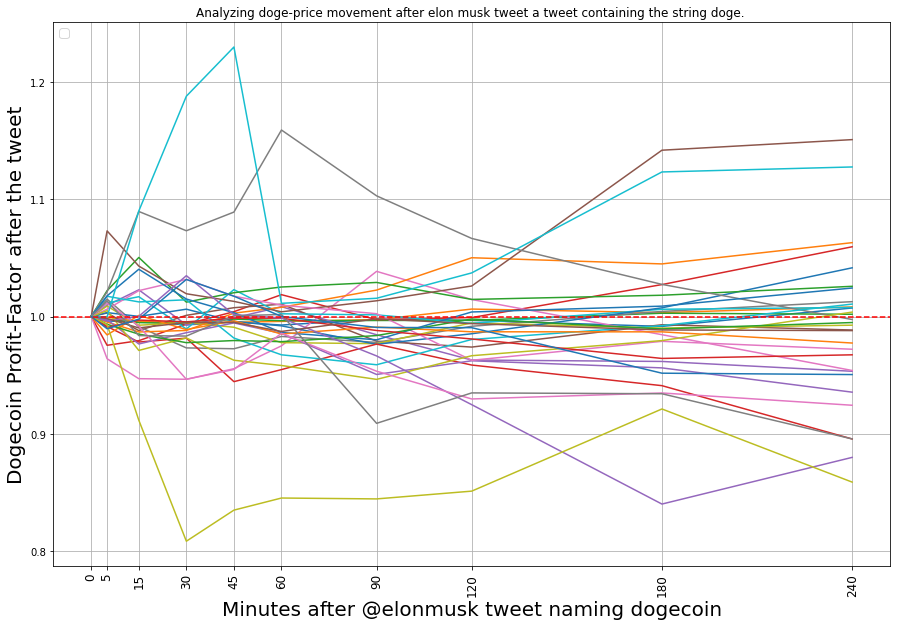

In [317]:
# Create X-axis
x_axis =list(positions_to_analize)
x_axis = [l*5 for l in x_axis]
x_axis = [0] + x_axis

plt.figure(figsize=(15,10))

for i in df_price_returns.index:
    
    plt.plot(x_axis[0:len(x_axis)-1],df_price_returns.loc[i][0:len(df_price_returns.keys())-1],linewidth=1.5)

plt.axhline(y = 1, color = 'r', linestyle = '--')

plt.title("Analyzing doge-price movement after elon musk tweet a tweet containing the string doge. ")

plt.xlabel('Minutes after @elonmusk tweet naming dogecoin',fontsize=20)

plt.xticks(x_axis[0:len(x_axis)-1],fontsize=12,rotation=90)

plt.grid()

plt.ylabel('Dogecoin Profit-Factor after the tweet',fontsize=20)

#pyplot.yscale('log')

plt.legend(fontsize=12,loc='upper left')

plt.show()

No handles with labels found to put in legend.


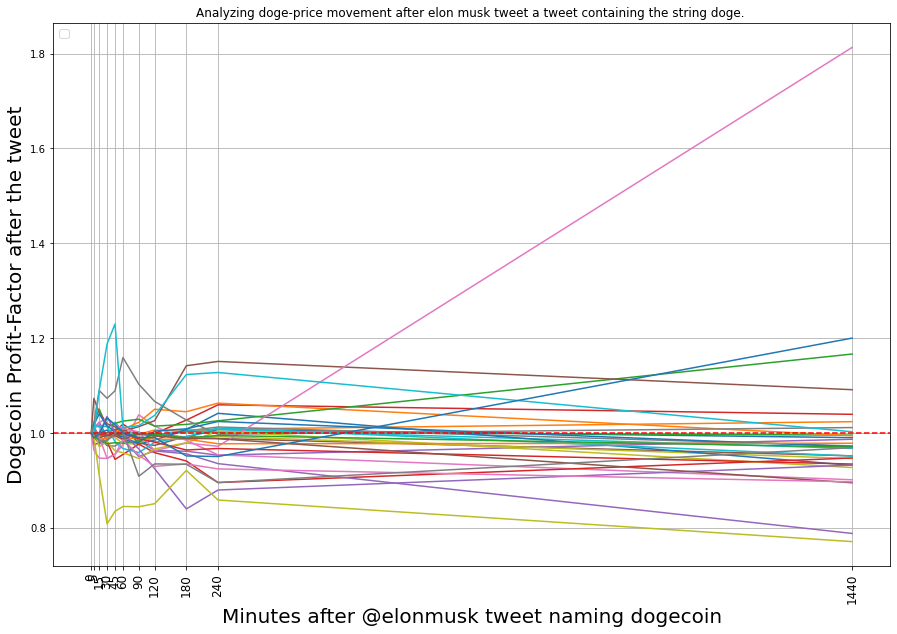

In [318]:
# Create X-axis
x_axis =list(positions_to_analize)
x_axis = [l*5 for l in x_axis]
x_axis = [0] + x_axis

plt.figure(figsize=(15,10))

for i in df_price_returns.index:
    
    plt.plot(x_axis,df_price_returns.loc[i],linewidth=1.5)

plt.axhline(y = 1, color = 'r', linestyle = '--')

plt.title("Analyzing doge-price movement after elon musk tweet a tweet containing the string doge. ")

plt.xlabel('Minutes after @elonmusk tweet naming dogecoin',fontsize=20)

plt.xticks(x_axis,fontsize=12,rotation=90)

plt.grid()

plt.ylabel('Dogecoin Profit-Factor after the tweet',fontsize=20)

#pyplot.yscale('log')

plt.legend(fontsize=12,loc='upper left')

plt.show()

## 5. Given two returns distribution and considering that both are a normal distribution. Does both belong to the same 

- Analyzing returns after:

        -5.2. 15 min
        
        -5.4. 1 h
        
        -5.6. 1 day


## 5.1. Distribution for 15 min returns

### 5.1.1 Mean and Sdv of the returns after 15 min of @elonmusk tweet containing the word doge

In [319]:
tweet_15_min_mean = df_price_returns.price_after_15_min.mean()-1
tweet_15_min_sdv = df_price_returns.price_after_15_min.std()

In [320]:
return_15_min_tweet = df_price_returns.price_after_15_min-1
return_15_min = df_doge_15m.close.pct_change().dropna()

### 5.1.2 Mean and Sdv of the returns 15 min

In [321]:
df_doge_15m=pd.read_csv('DOGEUSDT-15m-update-to-2023_01_26_11_15_00-from-2017_01_01_00_00_00.csv')
df_doge_15m["timestamp"] = pd.to_datetime(df_doge_15m["timestamp"],format = '%Y-%m-%d %H:%M:%S',utc='UTC')

returns_15_min_mean =df_doge_15m.close.pct_change().mean()
returns_15_min_sdv =df_doge_15m.close.pct_change().std()

### 5.1.3 Histogram of both distributions

In [279]:
print("The mean returns after 15 min of @elonmusk tweet is: ",tweet_15_min_mean)
print("The sdv returns after 15 min of @elonmusk tweet is: ",tweet_15_min_sdv)
print("\n")
print("The mean returns after 15 min is: ",np.format_float_positional(returns_15_min_mean, trim='-'))
print("The sdv returns after 15 min  is: ",returns_15_min_sdv)


The mean returns after 15 min of @elonmusk tweet is:  0.0013973726144893561
The sdv returns after 15 min of @elonmusk tweet is:  0.03541013067072178


The mean returns after 15 min is:  0.00005931711723406481
The sdv returns after 15 min  is:  0.008350567184526878


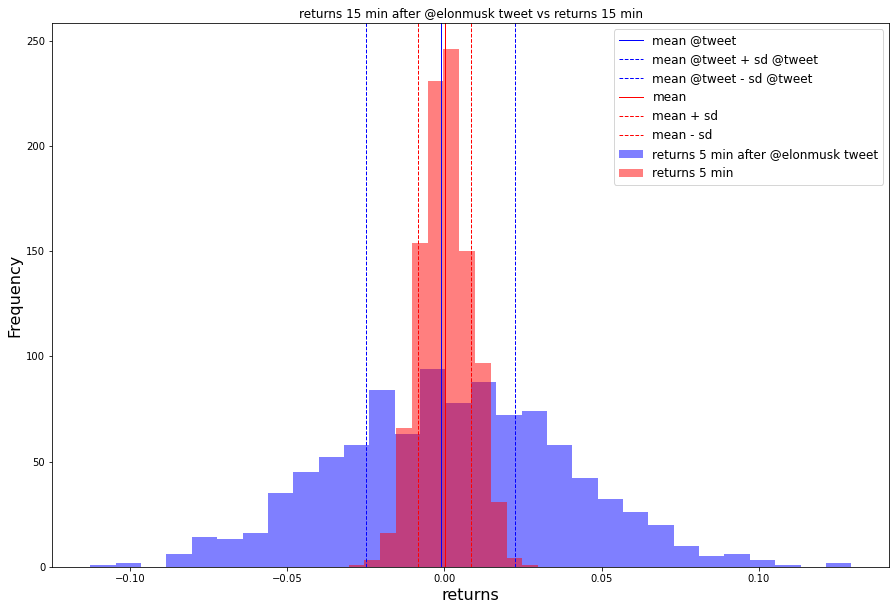

In [280]:
plt.figure(figsize=(15,10))

returns_after_15min_tweet = np.random.normal(loc=tweet_15_min_mean, scale=tweet_15_min_sdv, size=1000)

returns_15min = np.random.normal(loc=returns_15_min_mean, scale=returns_15_min_sdv, size=1000)

plt.hist(returns_after_15min_tweet, bins=30,color="b",alpha=0.5)

plt.hist(returns_15min, bins=12,color="r",alpha=0.5)

#plt.legend(labels,fontsize=8)

plt.xlabel("returns", fontsize=16)  
plt.ylabel("Frequency", fontsize=16)

plt.title("returns 15 min after @elonmusk tweet vs returns 15 min")


plt.axvline(tweet_5_min_mean, color='b', linestyle='-', linewidth=1)
plt.axvline(tweet_5_min_mean+tweet_5_min_sdv, color='b', linestyle='dashed', linewidth=1)
plt.axvline(tweet_5_min_mean-tweet_5_min_sdv, color='b', linestyle='dashed', linewidth=1)

plt.axvline(returns_5_min_mean, color='r', linestyle='-', linewidth=1)
plt.axvline(returns_5_min_mean-returns_5_min_sdv, color='r', linestyle='dashed', linewidth=1)
plt.axvline(returns_5_min_mean+returns_5_min_sdv, color='r', linestyle='dashed', linewidth=1)

labels = ["mean @tweet","mean @tweet + sd @tweet","mean @tweet - sd @tweet",
          "mean","mean + sd","mean - sd","returns 5 min after @elonmusk tweet","returns 5 min"]

plt.legend(labels,fontsize=12)

plt.show()

## 5.2. Distribution for 1h returns

### 5.2.1 Mean and Sdv of the returns after 1h of @elonmusk tweet containing the word doge

In [241]:
tweet_60_min_mean = df_price_returns.price_after_60_min.mean()-1
tweet_60_min_sdv = df_price_returns.price_after_60_min.std()

### 5.2.2 Mean and Sdv of the returns  1h

In [242]:
df_doge_1h=pd.read_csv('DOGEUSDT-1h-update-to-2023_01_26_11_00_00-from-2017_01_01_00_00_00.csv')

df_doge_1h["timestamp"] = pd.to_datetime(df_doge_1h["timestamp"],format = '%Y-%m-%d %H:%M:%S',utc='UTC')

df_doge_1h_mean =df_doge_1h.close.pct_change().mean()
df_doge_1h_sdv =df_doge_1h.close.pct_change().std()

### 5.2.3 Histogram of both distributions

In [243]:
print("The mean returns after 1h of @elonmusk tweet is: ",tweet_60_min_mean)
print("The sdv returns after 1h of @elonmusk tweet is: ",tweet_60_min_sdv)
print("\n")
print("The mean returns after 1h is: ",np.format_float_positional(df_doge_1h_mean, trim='-'))
print("The sdv returns after 1h is: ",df_doge_1h_sdv)

The mean returns after 1h of @elonmusk tweet is:  -0.006357390654268991
The sdv returns after 1h of @elonmusk tweet is:  0.043718147571026905


The mean returns after 1h is:  0.00022414313364027178
The sdv returns after 1h is:  0.016146562778548455


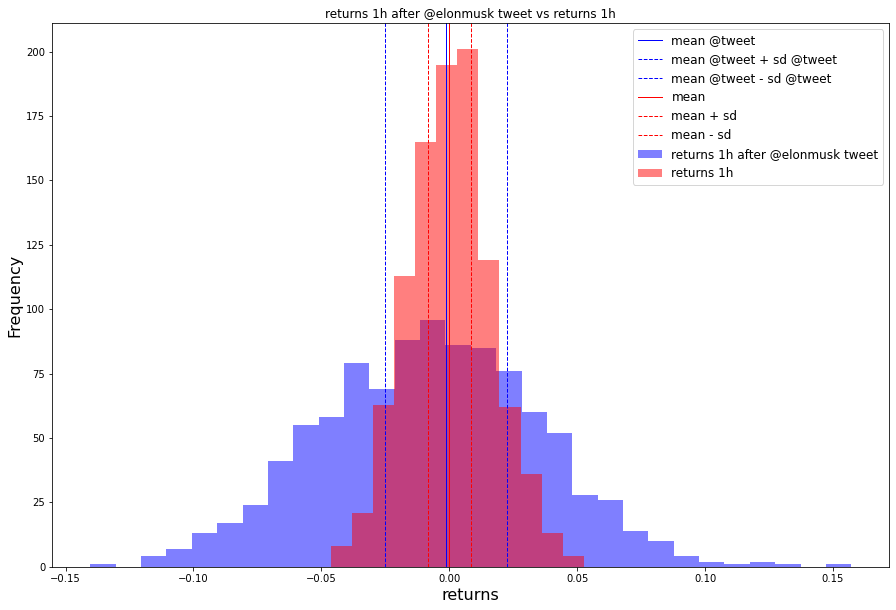

In [269]:
plt.figure(figsize=(15,10))

after_60min_tweet = np.random.normal(loc=tweet_60_min_mean, scale=tweet_60_min_sdv, size=1000)

returns_60min = np.random.normal(loc=df_doge_1h_mean, scale=df_doge_1h_sdv, size=1000)

plt.hist(after_60min_tweet, bins=30,color="b",alpha=0.5)

plt.hist(returns_60min, bins=12,color="r",alpha=0.5)

#plt.legend(labels,fontsize=8)

plt.xlabel("returns", fontsize=16)  
plt.ylabel("Frequency", fontsize=16)

plt.title("returns 1h after @elonmusk tweet vs returns 1h")


plt.axvline(tweet_5_min_mean, color='b', linestyle='-', linewidth=1)
plt.axvline(tweet_5_min_mean+tweet_5_min_sdv, color='b', linestyle='dashed', linewidth=1)
plt.axvline(tweet_5_min_mean-tweet_5_min_sdv, color='b', linestyle='dashed', linewidth=1)

plt.axvline(returns_5_min_mean, color='r', linestyle='-', linewidth=1)
plt.axvline(returns_5_min_mean-returns_5_min_sdv, color='r', linestyle='dashed', linewidth=1)
plt.axvline(returns_5_min_mean+returns_5_min_sdv, color='r', linestyle='dashed', linewidth=1)

labels = ["mean @tweet","mean @tweet + sd @tweet","mean @tweet - sd @tweet",
          "mean","mean + sd","mean - sd","returns 1h after @elonmusk tweet","returns 1h"]

plt.legend(labels,fontsize=12)

plt.show()

In [245]:
#Test Hypothesis: TO BE COMPLETED

## 5.3. Distribution for 1d returns

### 5.3.1 Mean and Sdv of the returns after 1d of @elonmusk tweet containing the word doge

In [247]:
tweet_1d_mean = df_price_returns.price_after_1440_min.mean()-1
tweet_1d_sdv = df_price_returns.price_after_1440_min.std()

### 5.2.2 Mean and Sdv of the returns  1h

In [248]:
df_doge_1d=pd.read_csv('DOGEUSDT-1d-update-to-2023_01_26_00_00_00-from-2017_01_01_00_00_00.csv')

df_doge_1d["timestamp"] = pd.to_datetime(df_doge_1h["timestamp"],format = '%Y-%m-%d %H:%M:%S',utc='UTC')

df_doge_1d_mean =df_doge_1d.close.pct_change().mean()
df_doge_1d_sdv =df_doge_1d.close.pct_change().std()

### 5.2.3 Histogram of both distributions

In [249]:
print("The mean returns after 1d of @elonmusk tweet is: ",tweet_1d_mean)
print("The sdv returns after 1d of @elonmusk tweet is: ",tweet_1d_sdv)
print("\n")
print("The mean returns after 1d is: ",np.format_float_positional(df_doge_1d_mean, trim='-'))
print("The sdv returns after 1d is: ",df_doge_1d_sdv)


The mean returns after 1d of @elonmusk tweet is:  -0.0025511815179662944
The sdv returns after 1d of @elonmusk tweet is:  0.1733717380002593


The mean returns after 1d is:  0.00670484933454423
The sdv returns after 1d is:  0.13243425417774726


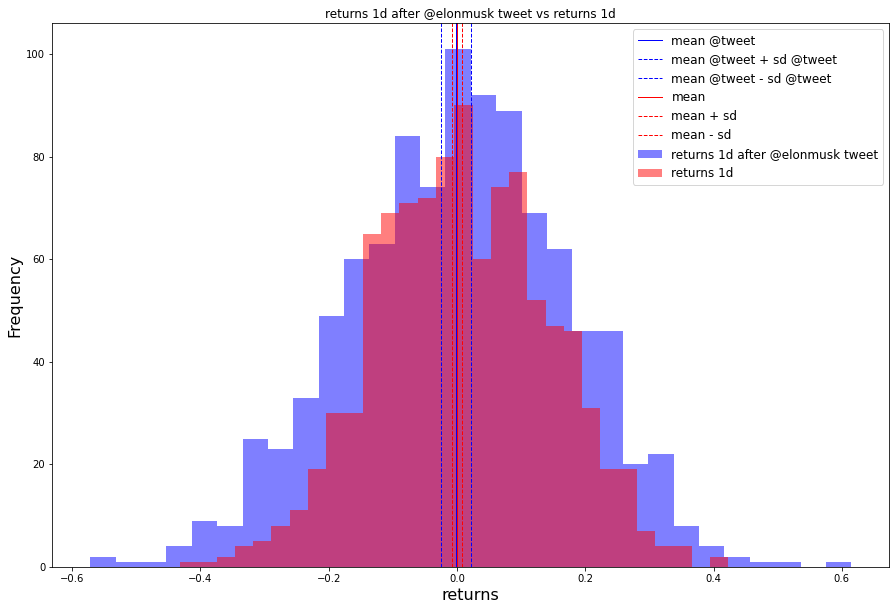

In [281]:
plt.figure(figsize=(15,10))

after_1d_tweet = np.random.normal(loc=tweet_1d_mean, scale=tweet_1d_sdv, size=1000)

returns_1d= np.random.normal(loc=df_doge_1d_mean, scale=df_doge_1d_sdv, size=1000)

plt.hist(after_1d_tweet, bins=30,color="b",alpha=0.5)

plt.hist(returns_1d, bins=30,color="r",alpha=0.5)

#plt.legend(labels,fontsize=8)

plt.xlabel("returns", fontsize=16)  
plt.ylabel("Frequency", fontsize=16)

plt.title("returns 1d after @elonmusk tweet vs returns 1d")


plt.axvline(tweet_5_min_mean, color='b', linestyle='-', linewidth=1)
plt.axvline(tweet_5_min_mean+tweet_5_min_sdv, color='b', linestyle='dashed', linewidth=1)
plt.axvline(tweet_5_min_mean-tweet_5_min_sdv, color='b', linestyle='dashed', linewidth=1)

plt.axvline(returns_5_min_mean, color='r', linestyle='-', linewidth=1)
plt.axvline(returns_5_min_mean-returns_5_min_sdv, color='r', linestyle='dashed', linewidth=1)
plt.axvline(returns_5_min_mean+returns_5_min_sdv, color='r', linestyle='dashed', linewidth=1)

labels = ["mean @tweet","mean @tweet + sd @tweet","mean @tweet - sd @tweet",
          "mean","mean + sd","mean - sd","returns 1d after @elonmusk tweet","returns 1d"]

plt.legend(labels,fontsize=12)

plt.show()

In [251]:
#Test Hypothesis: TO BE COMPLETED

# 6. Hypothesis Tests.

In [275]:
from statsmodels.stats.weightstats import ztest as ztest

## 6.1. Hypothesis test for 15 min returns

In [284]:
print("The mean returns after 15 min of @elonmusk tweet is: ",tweet_15_min_mean)
print("The sdv returns after 15 min of @elonmusk tweet is: ",tweet_15_min_sdv)
print("\n")
print("The mean returns after 15 min is: ",np.format_float_positional(returns_15_min_mean, trim='-'))
print("The sdv returns after 15 min  is: ",returns_15_min_sdv)

The mean returns after 15 min of @elonmusk tweet is:  0.0013973726144893561
The sdv returns after 15 min of @elonmusk tweet is:  0.03541013067072178


The mean returns after 15 min is:  0.00005931711723406481
The sdv returns after 15 min  is:  0.008350567184526878


In [289]:
df_doge_15m.close.pct_change().dropna()

1        -0.015401
2         0.015169
3         0.014658
4        -0.017172
5        -0.020324
            ...   
124692    0.003965
124693   -0.004647
124694    0.000350
124695   -0.003500
124696    0.003630
Name: close, Length: 124696, dtype: float64

In [291]:
df_price_returns.price_after_15_min-1

0    -0.003964
1    -0.004176
2    -0.005161
3    -0.020602
4     0.022754
5    -0.012030
6    -0.053027
7    -0.008683
8    -0.007432
9     0.016903
10    0.000083
11   -0.013173
12    0.050361
13   -0.021761
14   -0.023425
15    0.043012
16    0.022056
17    0.089593
18   -0.028930
19    0.012457
20    0.040308
21    0.000965
22   -0.015018
23   -0.003045
24    0.000130
25   -0.009735
26   -0.008172
27   -0.016279
28   -0.088445
29    0.089998
30   -0.002245
Name: price_after_15_min, dtype: float64

In [293]:
ztest(df_doge_15m.close.pct_change().dropna(), df_price_returns.price_after_15_min-1)

(-0.890225205511271, 0.3733449730121775)

## 6.2. Hypothesis test for 60 min returns

In [273]:
ztest(after_60min_tweet, returns_60min, value=0)

(-5.286310394520962, 1.2480805030797092e-07)

## 6.3. Hypothesis test for 1 day returns

In [274]:
ztest(after_1d_tweet, returns_1d, value=0)

(1.471854095638975, 0.1410602818927614)